# Customer Churn Prediction - Exploratory Data Analysis (EDA)

In this notebook, we explore the Telco Customer Churn dataset to uncover insights about 
customer behavior, churn patterns, and potential predictive features.

---

## 1. Import Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

df = pd.read_csv("../data/processed/churn_processed.csv")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,0,0,562,90003,327,33.964131,-118.272783,1,...,0,1,3,-0.362660,-1.641883,1,1,86,3239,3
1,9237-HQITU,1,0,0,562,90005,405,34.059281,-118.307420,0,...,0,1,2,0.197365,-1.235224,1,1,67,2701,13
2,9305-CDSKC,1,0,0,562,90006,393,34.048013,-118.293953,0,...,0,1,2,1.159546,1.507078,1,1,86,5372,13
3,7892-POOKP,1,0,0,562,90010,410,34.062125,-118.315709,0,...,0,1,2,1.330711,-0.323948,1,1,84,5003,13
4,0280-XJGEX,1,0,0,562,90015,385,34.039224,-118.266293,1,...,0,1,0,1.294151,0.533320,1,1,89,5340,2


## 2. Dataset Overview
Before diving into analysis, let's understand the structure of the dataset.

In [ ]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
df.describe().T

Shape: (7043, 33)

Columns: ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']

Missing values:
 CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tec

,count,mean,std,min,25%,50%,75%,max
Count,7043.0,1.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Country,7043.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
State,7043.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
City,7043.0,5.937136e+02,314.990288,0.000000,337.000000,601.000000,869.000000,1128.000000
Zip Code,7043.0,9.352196e+04,1865.794555,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
Lat Long,7043.0,7.935356e+02,480.597035,0.000000,376.000000,771.000000,1211.000000,1651.000000
Latitude,7043.0,3.628244e+01,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,-1.197989e+02,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Gender,7043.0,5.047565e-01,0.500013,0.000000,0.000000,1.000000,1.000000,1.000000
Senior Citizen,7043.0,1.621468e-01,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000


## 3. Churn Distribution
First, let’s check how balanced the target variable **Churn** is.

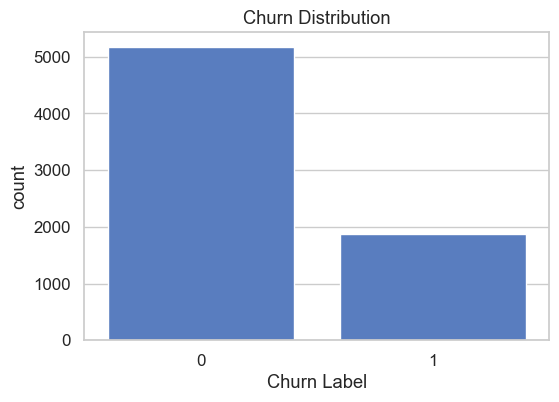

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn Label", data=df)
plt.title("Churn Distribution")
plt.show()

## 4. Demographic Insights
### 4.1 Gender vs Churn
Does gender impact churn behavior?

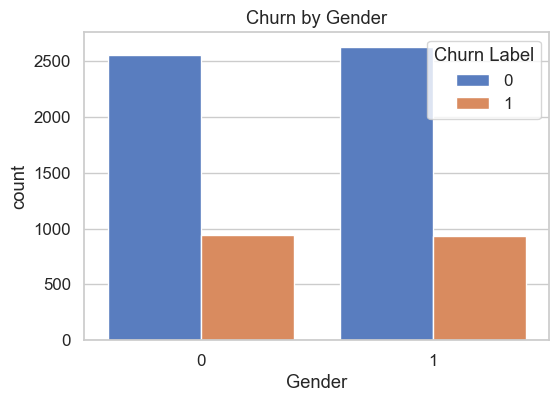

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="Churn Label", data=df)
plt.title("Churn by Gender")
plt.show()

### 4.2 Senior Citizen vs Churn
Do senior citizens churn more often?

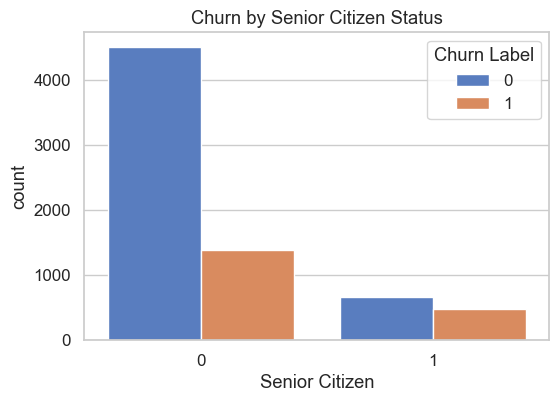

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Senior Citizen", hue="Churn Label", data=df)
plt.title("Churn by Senior Citizen Status")
plt.show()

## 5. Service-related Insights
### 5.1 Internet Service vs Churn

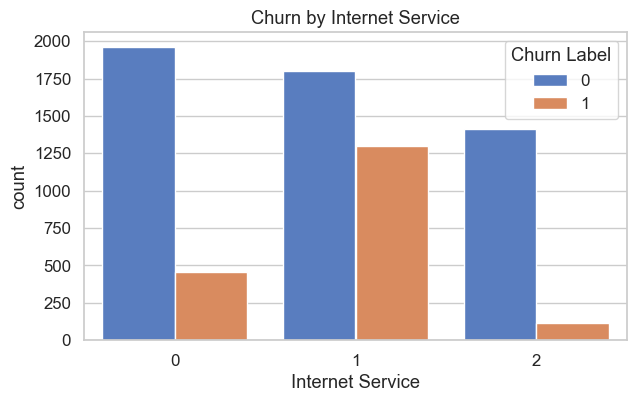

In [6]:
plt.figure(figsize=(7,4))
sns.countplot(x="Internet Service", hue="Churn Label", data=df)
plt.title("Churn by Internet Service")
plt.show()

### 5.2 Contract Type vs Churn

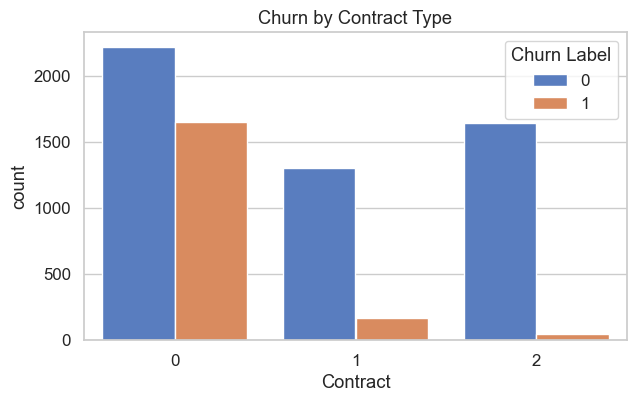

In [7]:
plt.figure(figsize=(7,4))
sns.countplot(x="Contract", hue="Churn Label", data=df)
plt.title("Churn by Contract Type")
plt.show()

## 6. Numeric Features
### 6.1 Tenure vs Churn

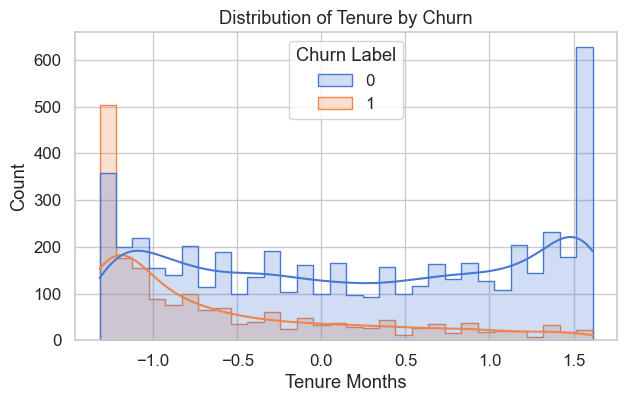

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x="Tenure Months", hue="Churn Label", bins=30, kde=True, element="step")
plt.title("Distribution of Tenure by Churn")
plt.show()

### 6.2 Monthly Charges vs Churn

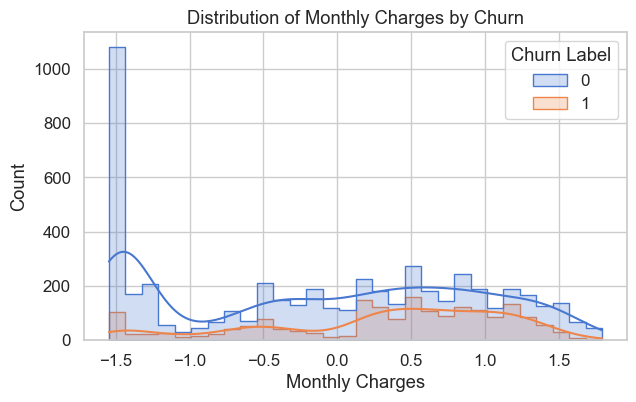

In [9]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x="Monthly Charges", hue="Churn Label", bins=30, kde=True, element="step")
plt.title("Distribution of Monthly Charges by Churn")
plt.show()

## 7. Correlation Analysis
Finally, let’s check correlations among numeric features.

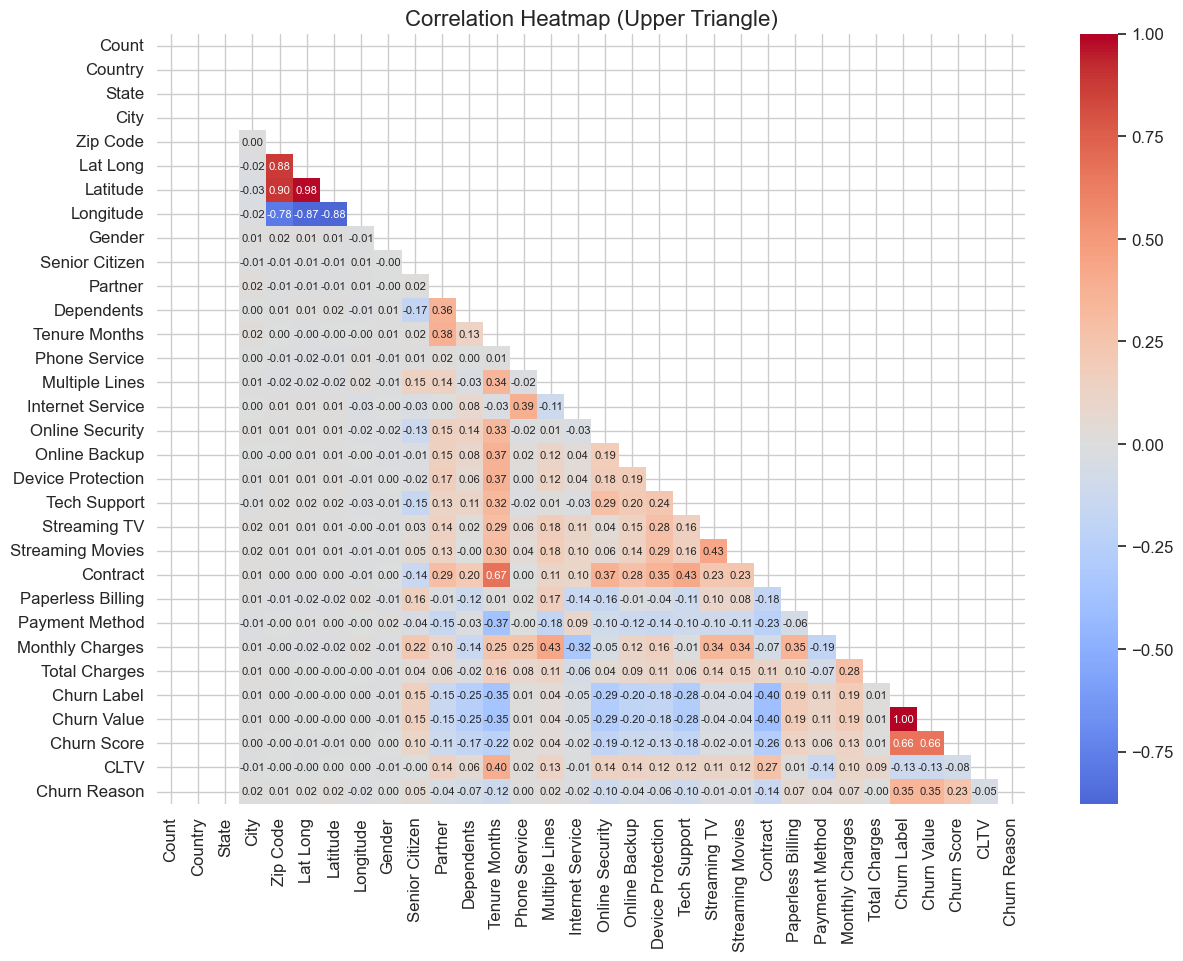

In [13]:
import numpy as np

corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14,10))
sns.heatmap(corr, 
            mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            center=0,
            annot_kws={"size":8})
plt.title("Correlation Heatmap (Upper Triangle)", fontsize=16)
plt.show()